In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Read Data Set using pandas data frame

In [3]:
salary=pd.read_csv("ds_salaries.csv")

printing a head of the data set to read a simple of data

In [4]:
salary.head(5)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


Get the info of the data to know the type of each column and the number of null and non-null entries

conclusion
the data doesn't contain any null value
the number of rows is 607
number of column is 11

In [5]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


Get all the statistics value of each column
conclusion
mean work year 2021.41 "the most of the employees get jobs in 2021"
mean of salaries is 112297
the most of the people in data set work remotely



In [7]:
salary.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


Top job title is Data Scientist with count 143

In [10]:
salary['job_title'].describe()

count                607
unique                50
top       Data Scientist
freq                 143
Name: job_title, dtype: object

most of working people are seniors level
280 out of 607 are seniors

In [75]:
salary['experience_level'].describe()

count     607
unique      4
top        SE
freq      280
Name: experience_level, dtype: object

senior of data science can eran more than an expert in other fields
most of the experts work as Director data science
most of the seniors work as Data Engineers
most of MI level work as Data Scientist

<AxesSubplot:xlabel='salary_in_usd', ylabel='job_title'>

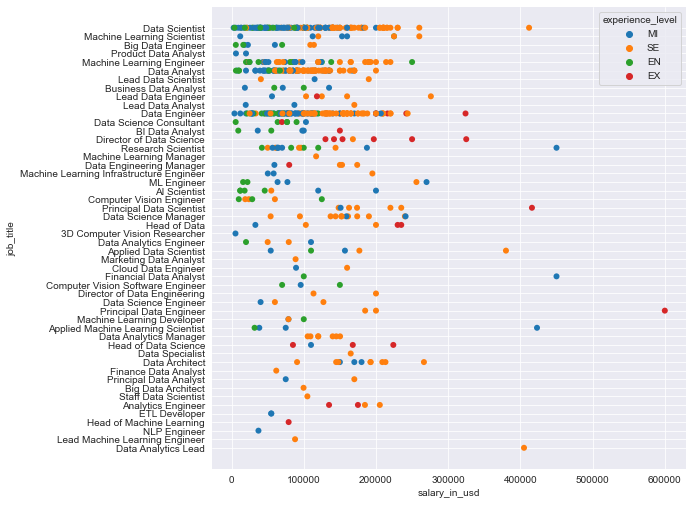

In [22]:
f, ax = plt.subplots(figsize=(8.5, 8.5))
sns.despine(f, left=True, bottom=True)
sns.color_palette("tab10")

sns.scatterplot(x="salary_in_usd", y="job_title",
                hue="experience_level",
                palette="tab10",
                sizes=(4, 16), linewidth=0,
                data=salary, ax=ax)

relation between experience level and salary
increases by the experience level in general

<AxesSubplot:xlabel='experience_level', ylabel='salary_in_usd'>

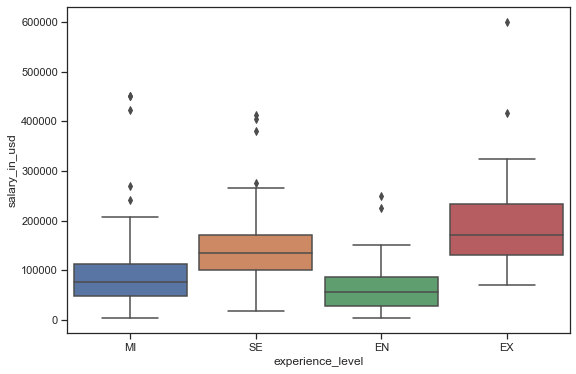

In [47]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(9, 6))
sns.color_palette("tab10")
sns.boxplot(x="experience_level", y="salary_in_usd", data=salary,
            width=.9)



large companies have more variety in experience levels
large companies pay more salary

<AxesSubplot:xlabel='company_size', ylabel='salary_in_usd'>

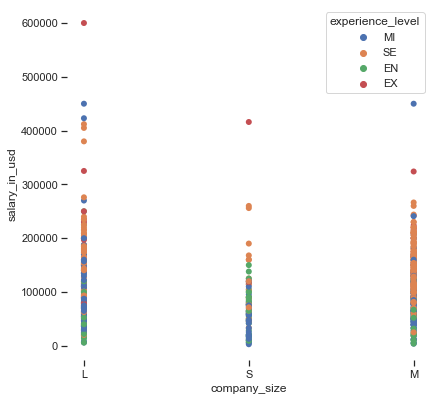

In [88]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.color_palette("hls", 8)
sns.scatterplot(x="company_size", y="salary_in_usd",
                hue="experience_level",

                sizes=(1, 8), linewidth=0,
                data=salary, ax=ax)

studies the same relation of the previous graph but more detailed
small companies have more experts ""
EN level have a near range of salary in the 3 types of companies
on average small companies pay more for experts
salaries of experts on average are near

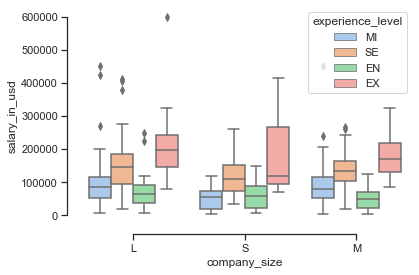

In [29]:
sns.color_palette("hls", 8)
sns.boxplot(x="company_size", y="salary_in_usd",
            hue="experience_level",
            data=salary)
sns.despine(offset=10, trim=True)

Salary of the remote workers better than offline worker

<AxesSubplot:xlabel='salary_in_usd', ylabel='Count'>

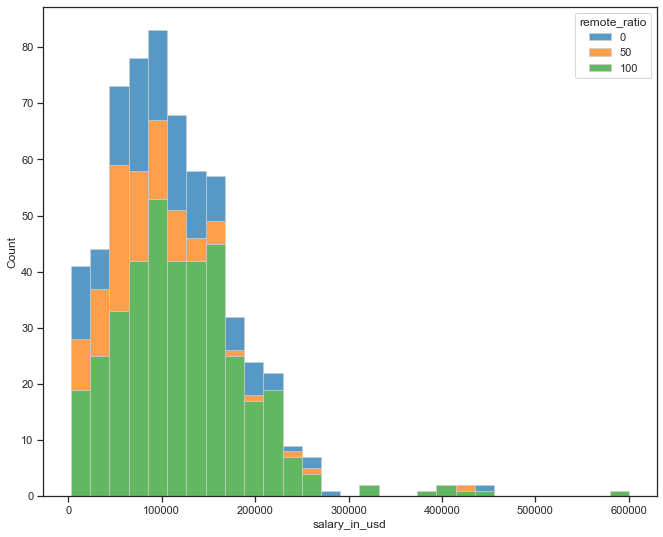

In [56]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(11, 9))
sns.histplot(
    salary,
    x="salary_in_usd", hue="remote_ratio",
    multiple="stack",
    edgecolor=".8",
    linewidth=.7,palette="tab10"

)



Relation between each country and the remote working percent
some countries don't offer remote working


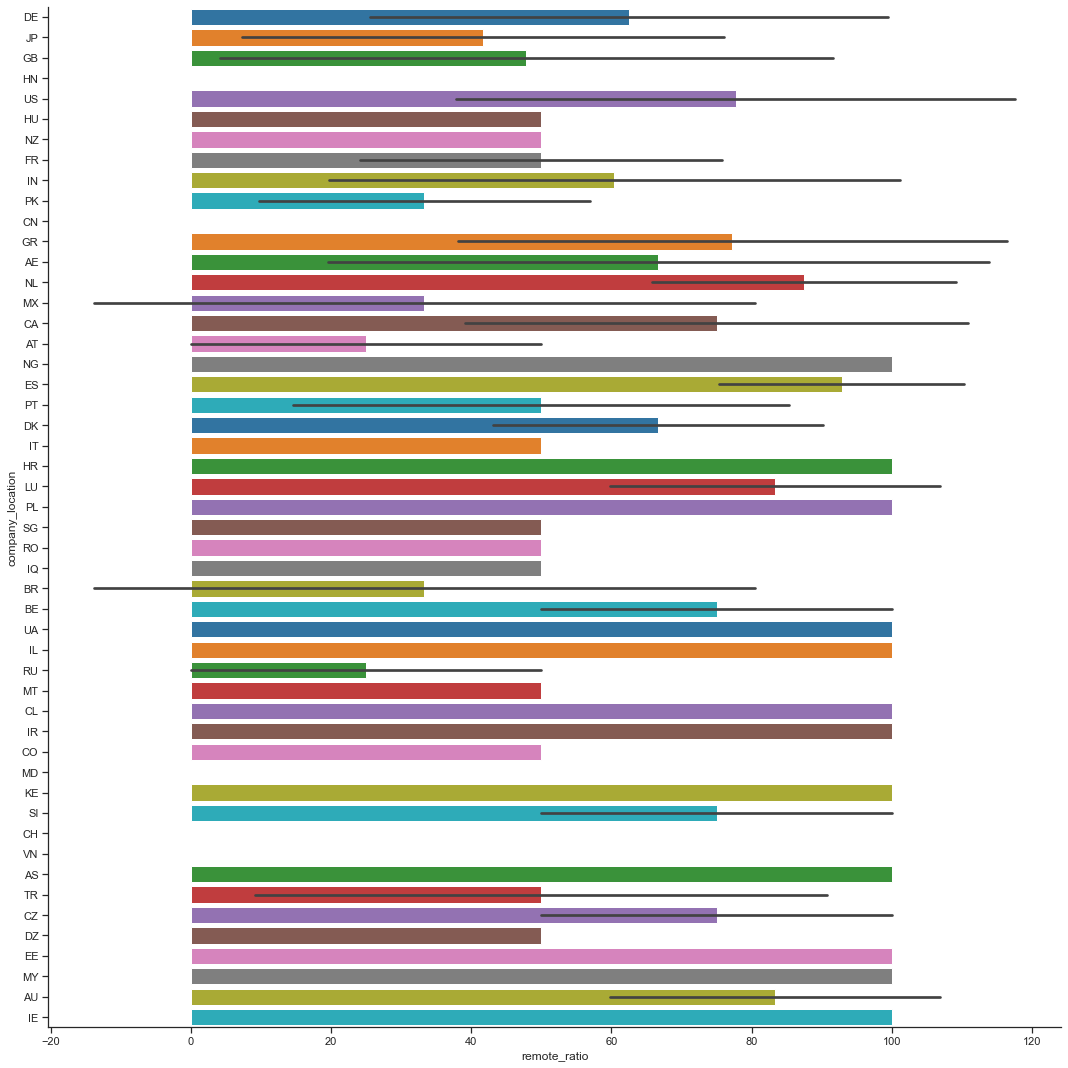

In [74]:
sns.catplot(
    data=salary,x="remote_ratio", y="company_location",  kind="bar",
    ci="sd", palette="tab10", alpha=1, height=15
)

<AxesSubplot:xlabel='remote_ratio', ylabel='work_year'>

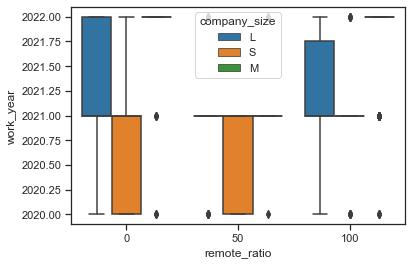

In [82]:
sns.set_theme(style="ticks")

sns.boxplot(y="work_year", x="remote_ratio",
            hue="company_size", palette="tab10",
            data=salary)

the number of remote worker increase day by day

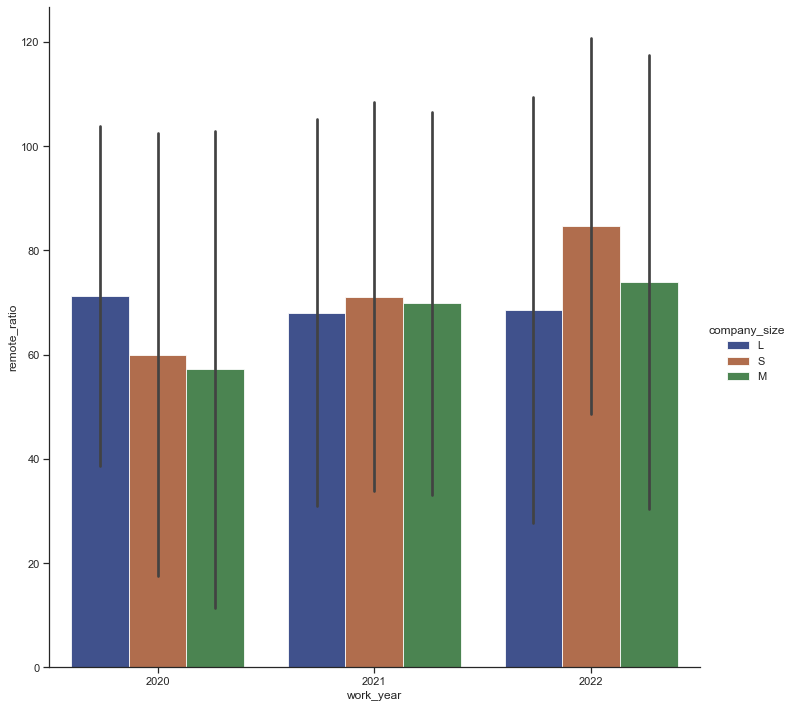

In [87]:
g = sns.catplot(
    data=salary, kind="bar",
    x="work_year", y="remote_ratio",
    hue="company_size",
    ci="sd", palette="dark", alpha=.8, height=10
)


Make lists of regions to categorize the data

In [105]:
Asia=["AE","AF"," AM","AZ","BD","BH","BN","BT","CC","CN","CX","CY","GE","HK","ID","IL","IN","IO","IQ","IR","JO","JP","KG","KH","KP","KR","KW","KZ","LA","LB","LK","MM","MN","MO","MV","MY","NP","OM","PH","PK","PS","QA","RU","SA","SG","SY","TH","TJ","TL","TM","TR","TW",'UZ',"VN","XD","XE","XS","YE"]

In [106]:
africa=["AO","BF","BI","BJ","BW","CD","CF","CG","CI",'CM',"CV",'DJ','DZ','EG','EH','ER','ET','GA','GH','GM','GN','GQ','GW','KE','KM','LR''LS','LY','MA','MG','ML','MR','MU','MW','MZ','NA','NE','NG','RE','RW','SC','SD','SH','SL','SN','SO','SS','ST','SZ','TD','TG','TN','TZ','UG','YT','ZA','ZM',"ZW"]

In [107]:
Antarctica=['AQ','BV','GS',"HM","TF"]

In [108]:
South_America=['AR','BO','BR','CL','CO','EC','FK','GF','GY','PE','PY','SR','UY','VE']

In [109]:
Europe=['AD','AL','AM','AT','AX','AZ','BA','BE','BG','BY','CH','CY','CZ','DE','DK','EE','ES','FI','FO','FR','GB','GE','GG','GI','GR','HR','HU','IE','IM','IS','IT','JE','KZ','LI','LT','LU','LV','MC','MD','ME','MK','MT','NL','NO','PL','PT','RO','RS','RU','SE','SI','SJ','SK','SM','TR','UA','VA','XK']

In [110]:
North_America=['AG','AI','AN','AW','BB','BL','BM','BQ','BS','BZ','CA','CR','CU','CW','DM','DO','GD','GL','GP','GT','HN','HT','JM','KN','KY','LC','MF','MQ','MS','MX','NI','PA','PM',	'PR','SV','SX','TC','TT','UM','US','VC','VG','VI'
]

In [111]:
Oceania=['AS','AU','CK','FJ','FM','GU','KI','MH','MP','NC','NF','NR','NU','NZ','PF','PG','PN','PW','SB','TK','TO','TV','UM','VU','WF','WS','XXAS','AU','CK','FJ','FM','GU','KI','MH','MP','NC','NF','NR','NU','NZ','PF','PG','PN','PW','SB','TK','TO','TV','UM','VU','WF','WS','XX',
]

Categorizing the data

In [135]:
salary['company_continent']=salary["company_location"].apply(lambda title:"North America"if(title.upper() in North_America) else "Europe" if (title.upper()in Europe) else "Africa" if(title.upper() in africa) else"South America" if (title.upper()in South_America) else"Asia" if (title.upper() in Asia) else"Oceania"if(title.upper() in Oceania) else "Antarctica" if(title.upper()in Antarctica) else "" )





In [137]:
salary.head(5)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,company_continent
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,Europe
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,Asia
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,Europe
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,North America
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,North America


number of Remote employees in Africa is larger than other continent

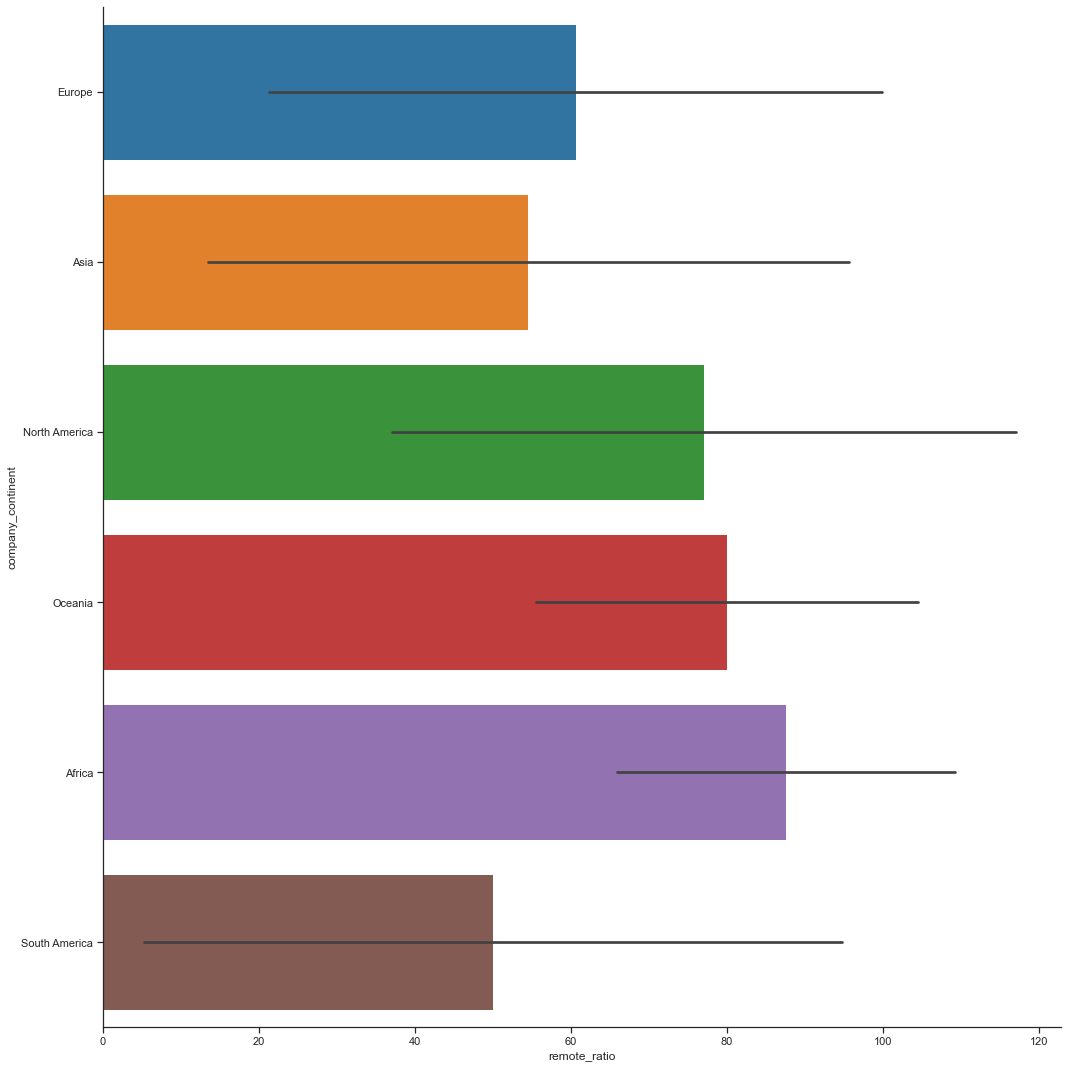

In [138]:
sns.catplot(
    data=salary,x="remote_ratio", y="company_continent",  kind="bar",
    ci="sd", palette="tab10", alpha=1, height=15
)

the largest number employees in north america
the best salaries in north america

<AxesSubplot:xlabel='salary_in_usd', ylabel='job_title'>

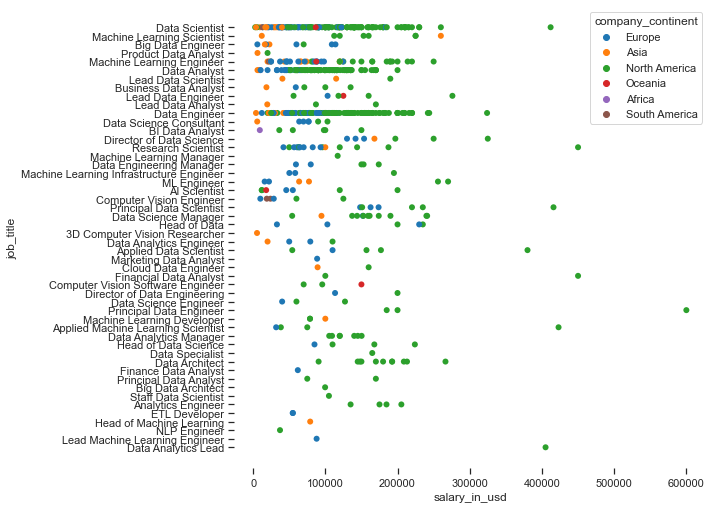

In [140]:
f, ax = plt.subplots(figsize=(8.5, 8.5))
sns.despine(f, left=True, bottom=True)
sns.color_palette("tab10")

sns.scatterplot(x="salary_in_usd", y="job_title",
                hue="company_continent",
                palette="tab10",
                sizes=(4, 16), linewidth=0,
                data=salary, ax=ax)

South America and Africa and Oceania have the largest number of remote working
so on the three continent have lest number of jobs

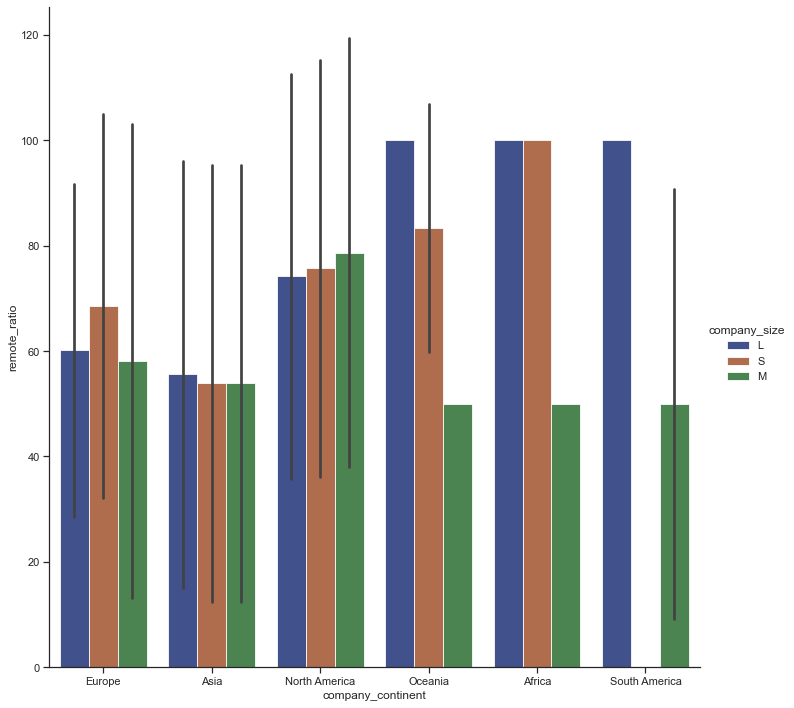

In [141]:
g = sns.catplot(
    data=salary, kind="bar",
    x="company_continent", y="remote_ratio",
    hue="company_size",
    ci="sd", palette="dark", alpha=.8, height=10
)